In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 200
x_test = np.linspace(-1, 1, n).reshape(-1, 1)

In [38]:
def sqExpKernel(a, b, param):
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

def linearKernel(a, b, param):
    return np.dot(a, b.T)

def quadraticKernel(a, b, param):
    return (np.dot(a, b.T) + param) ** 2

def brownianKernel(a, b, param):
    return np.min(a, b.T)

def ornsteinUhlenbeckKernel(a, b, param):
    dist = np.abs(a - b.T)
    return np.exp(-dist/param)

def periodicKernel(a, b, param):
    dist = a - b.T
    return np.exp(-(2/param) * np.sin(dist/2)**2)

def gaussianKernel(a, b, params):
    mu, w = params
    sep = (a-mu)**2 + (b.T-mu)**2
    return np.exp(-sep/(2*w))

def convKernel(a, b, params):
    l, mu, w = params
    k1 = sqExpKernel(a, b, l)
    k2 = gaussianKernel(a, b, (mu, w))
    return k1*k2

kernel = convKernel
# param = 0.5
param = (.5, .0, 0.025) # convKernel takes 3 params
K_ss = kernel(x_test, x_test, param)
L = np.linalg.cholesky(K_ss + 1e-12*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,7)))

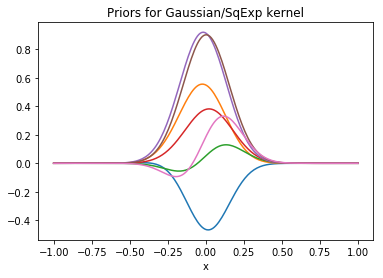

In [39]:
plt.plot(x_test, f_prior, alpha=1)
plt.xlabel('x')
plt.title("Priors for Gaussian/SqExp kernel")
plt.show()